In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv'
titanic = pd.read_csv(csv_path)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exercise 1:**. Make a dataframe using pivot_table of counts of passengers in each Pclass.  You will have a table at the end with 3 rows and 2 columns (you will want to use .reset_index() to convert Pclass to a column instead of the index).  Call the table Classes.

In [4]:
# YOUR CODE HERE
Classes= titanic.pivot_table(values='Name', aggfunc=len, index='Pclass').reset_index()
Classes

,Pclass,Name
0,1,216
1,2,184
2,3,491


**Exercise 2:**  Use Classes to make a barplot showing the number of passengers in each Pclass.  Label the x and y axes more appropriately than the column names themselves and make the figure larger than default.

<AxesSubplot:xlabel='Pclass', ylabel='Name'>

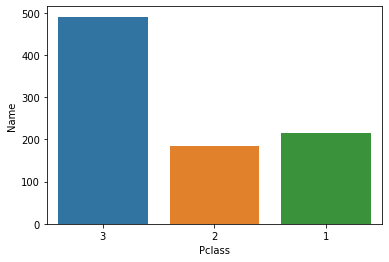

In [5]:
# YOUR CODE HERE
sns.barplot(data=Classes, x='Pclass', y='Name', order=[3,2,1])

Note that the ordering is probably 1st class on the left, then 2nd, then 3rd.  We want to re-order them so that 3rd class is on the left and 1st on the right.  Most sns plotting functions have an optional argument:  order=['A','B','C'].  Use order to make the graph the way we would like it.

**Exercise 3:**  Make an overlaid histogram of the ages of the passengers using displot, Pclass==1 in one color, Pclass==2 in a second color and Pclass==3 in a third.  Make sure to include an appropriate legend.

In [21]:
titanic['Class'] = titanic['Pclass'].astype('str')

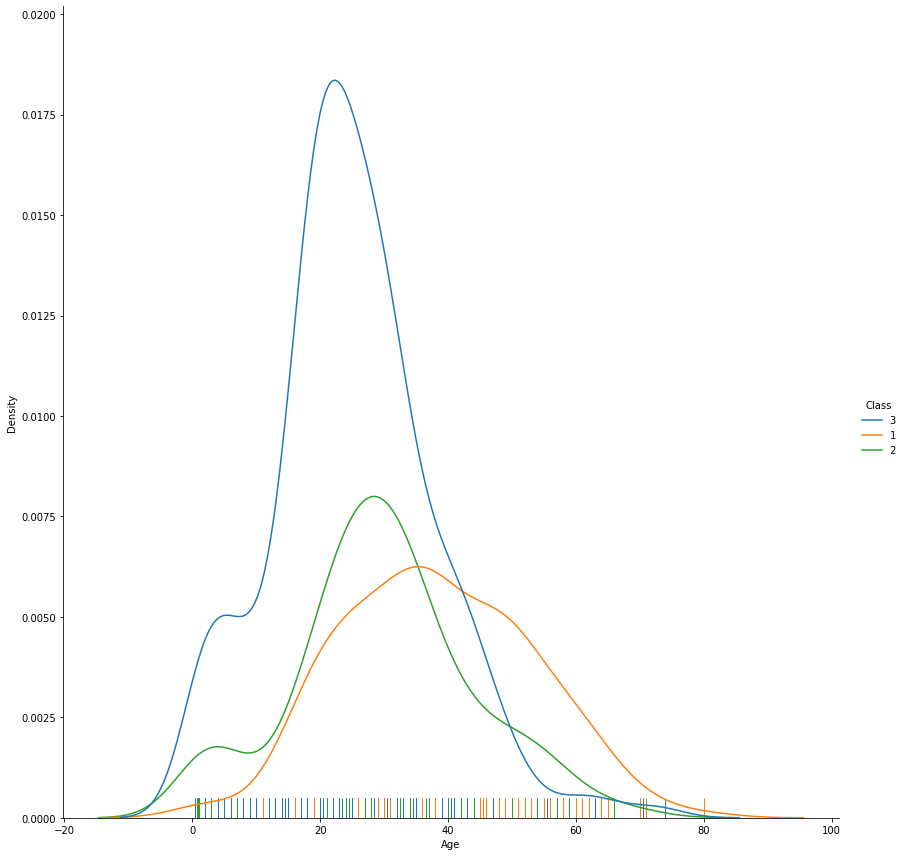

In [22]:
sns.displot(data=titanic, x='Age', hue='Class', rug=True, height=12, kind='kde')

**Exercise 4:**  Use a jointplot to look at the survivability vs. 'Age' and 'Fare'.  'Fare' is skewed very low and isn't terribly informative by itself.  You might want to create a new column 'LogFare' which takes the log of 'Fare' and uses that in the plot instead.  

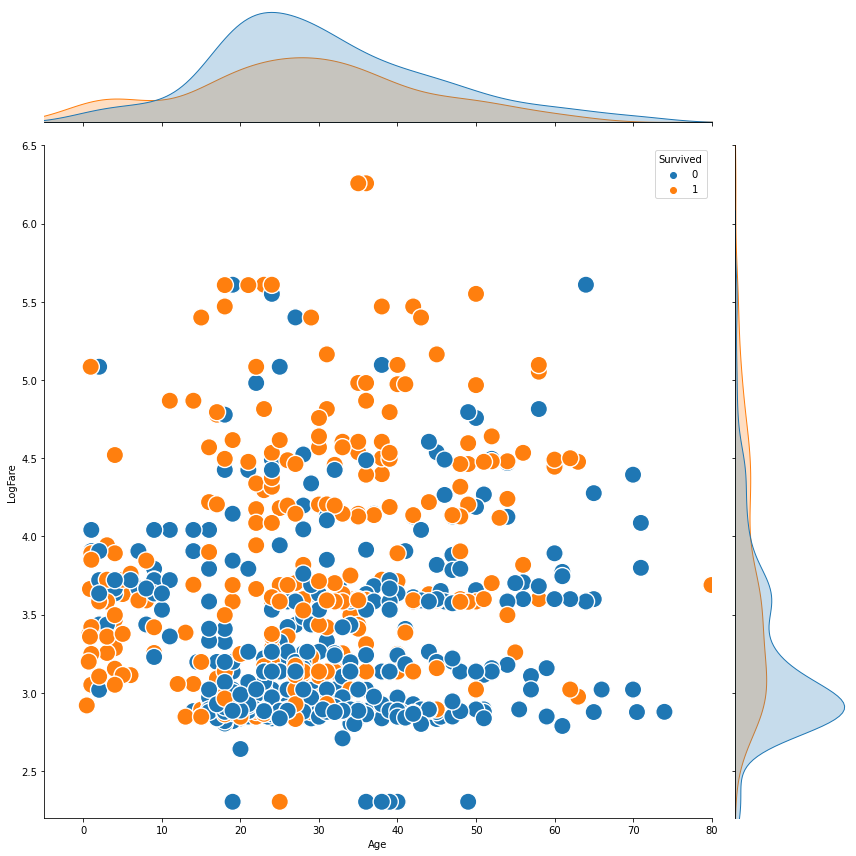

In [25]:
titanic['LogFare'] = (np.log(10+titanic['Fare']))
sns.jointplot(data=titanic, x='Age', y='LogFare', hue='Survived', height=12, xlim=[-5,80], 
              ylim=[2.2,6.5], joint_kws={"s":300})